In [2]:
## Homework 3
##
## simple MNIST classifier network
##
## NSC3270/5270 Fall 2022

import numpy as np
import matplotlib.pyplot as plt

# supress some unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load, display, and format mnist images and labels

In [3]:
from tensorflow.keras.datasets import mnist

# load mnist images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# check dimensions and type of images and labels

print('train')
print(train_images.shape)
print(train_labels.shape)
print(type(train_images))
print(type(train_labels))
print()

print('test')
print(test_images.shape)
print(test_labels.shape)
print(type(test_images))
print(type(test_labels))

train
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

test
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


There are 60,000 train images and 10,000 test images. Each image is 28x28 pixels (gray scale).

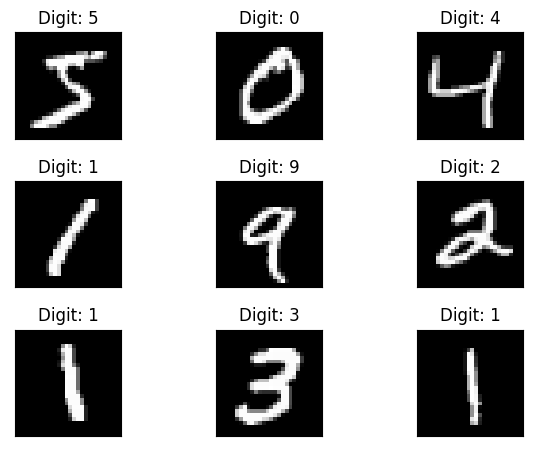

In [5]:
# display the first 9 digits

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### reformat training and testing images

In [6]:
# check out (again) dimensions and types of mnist data
print('Training images shape: ', train_images.shape)
print('Training pixel type:   ', type(train_images[0][0][0]))
print('Testing images shape:  ', test_images.shape)
print('Testing pixel type:    ', type(test_images[0][0][0]))

print(train_images[0][15][:])

Training images shape:  (60000, 28, 28)
Training pixel type:    <class 'numpy.uint8'>
Testing images shape:   (10000, 28, 28)
Testing pixel type:     <class 'numpy.uint8'>
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253
 150  27   0   0   0   0   0   0   0   0]


In [7]:
# number of images
Ntr = train_images.shape[0]
Nts = test_images.shape[0]

# image shape
szx = train_images.shape[1]
szy = train_images.shape[2]

# need to reshape the 28x28 training/testing images as vectors
train_images_vec = train_images.reshape((Ntr, szx * szy))
test_images_vec = test_images.reshape(  (Nts, szx * szy))

# deciding to normalize the pixels to 0..1 and recase as float32
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images_vec.astype('float32') / 255

# display new input dimensions/type
print('New training images shape: ', train_images_vec.shape)
print('New training pixel type:   ', type(train_images_vec[0][0]))
print('New testing images shape:  ', test_images_vec.shape)
print('New testing pixel type:    ', type(test_images_vec[0][0]))

New training images shape:  (60000, 784)
New training pixel type:    <class 'numpy.float32'>
New testing images shape:   (10000, 784)
New testing pixel type:     <class 'numpy.float32'>


### reformat training and testing labels

In [8]:
# check out dimensions and types of mnist data
print('Training labels shape: ', train_labels.shape)
print('Training labels type:  ', type(train_labels[0]))
print()

# check out what the first 9 labels look like
print("First 9 training labels as labels:\n", train_labels[:9])

Training labels shape:  (60000,)
Training labels type:   <class 'numpy.uint8'>

First 9 training labels as labels:
 [5 0 4 1 9 2 1 3 1]


In [9]:
from tensorflow.keras.utils import to_categorical

# also need to categorically encode the labels as "one hot"

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

print("First 9 training labels as one-hot encoded vectors:\n", train_labels_onehot[:9])

First 9 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
# display new output dimensions/type
print('New training labels shape (one hot): ', train_labels_onehot.shape)
print('New training labels type (one hot):  ', type(train_labels_onehot[0][0]))

New training labels shape (one hot):  (60000, 10)
New training labels type (one hot):   <class 'numpy.float32'>


# define and train neural network

In [11]:
# import tools for basic keras networks 
from tensorflow.keras import models
from tensorflow.keras import layers

nout = 10

# create architecture of simple neural network model
# input layer  : 28*28 = 784 input nodes
# output layer : 10 (nout) output nodes
network = models.Sequential()
network.add(layers.Dense(nout, 
                         activation='sigmoid', 
                         input_shape=(szx * szy,)))

# print a model summary
print(network.summary())
print()
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
for layer in network.layers:
    print(layer.get_config())
print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense | input shape : (None, 784) | output shape : (None, 10)

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [12]:
# compile network
network.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['accuracy'])

# now train the network
history = network.fit(train_images_vec, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=20, 
                      batch_size=128)
print('Done training!')
print()

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.1414 - accuracy: 0.1133 - val_loss: 0.1051 - val_accuracy: 0.1968
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.2791 - val_loss: 0.0919 - val_accuracy: 0.3468
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.3967 - val_loss: 0.0865 - val_accuracy: 0.4432
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.4712 - val_loss: 0.0828 - val_accuracy: 0.5118
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.5184 - val_loss: 0.0797 - val_accuracy: 0.5577
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.5512 - val_loss: 0.0768 - val_accuracy: 0.5880
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.5744 - val_loss: 0.0740 - val_accuracy: 0.6075
Epoch 

In [13]:
# test network
test_loss, test_acc = network.evaluate(test_images_vec, 
                                       test_labels_onehot, 
                                       verbose=True)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.7218
test_acc: 0.7218000292778015


# some pieces needed to complete Homework 3

In [14]:
# get learned network weights and biases

W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden

print('W {} | B {}'.format(W.shape, B.shape))

W (784, 10) | B (10,)


In [15]:
# model predictions (all 10000 test images)
out = network.predict(test_images_vec)

# model predictions (a single test image)
example = test_images_vec[123]
print(example.shape)

# vector passed to network.predict must be (?, 784)
example = example.reshape((1,example.shape[0]))
print(example.shape)

313/313 [==============================] - 1s 1ms/step
(784,)
(1, 784)


In [16]:
out.shape

(10000, 10)

In [17]:
#########################################################################################
##
## Homework 3 Solution Area
##

## Q1. The original MNIST test_labels numpy array contains the digit value associated
## with the corresponding digit image (test_images). The output from the network (from
## out = network.predict(test_images_vec) above) contains the activations of the 10
## output nodes for every test image presented to the network. Write a function that
## takes the (10000,10) numpy array of output (of type float) activations and returns a 
## (10000,) numpy array of discrete digit classification by the network (of type int).
## Specifically, create a test_decisions numpy array of the same size and type as the
## MNIST test_labels array you started with. Whereas test_labels shows the correct
## answer, test_decisions shows the ultimate decision by the network. Below you will use 
## both arrays to pull out test images that the network classifies correctly vs. incorrectly.
##
## To turn a numpy array of continuous output activations into a discrete digit classification,
## just take the maximum output as the "winner" that "takes all", determining the classification.
##
## In your function, feel free to use for loops. Here, we are looking to see that you understand
## how to use the outputs generated by the network, not whether you can program using the
## most efficient Python style.

### INSERT Q1 SOLUTION HERE ###




In [18]:
# a cell where I'm just trying to get my bearings, can edit this later
# what's the general shape of the outputs
print(out.shape)
# what do the values inside there look like?
print(out[0,:])
# which one of those values is the largest?
print(np.argmax(out[0,:]))
print(np.argmax(out[0][:]))
# hey this is great, argmax tells me which output unit was the winner!
# now where can I find the right answer, the actual identity of the digit?
print(test_labels[0])
# will return true if the network got this one wrong
print(not (np.argmax(out[0,:])==test_labels[0]))
print(np.argmax(out[0,:])!=test_labels[0])
# I kind of want to confirm that this is really a 7, I'm going to look at the 
# image. I know I don't have to do this for Q1 but it's a sanity check, I'll delete 
# it before submitting
# fig = plt.figure()
# plt.tight_layout()
# plt.imshow(test_images[0], cmap='gray', interpolation='none')
# plt.title("Digit: {}".format(test_labels[0]))
# plt.xticks([])
# plt.yticks([])
# plt.show()

# ok I gotta inspect every single output I guess
test_decisions = np.zeros((10000,))
for i in np.arange(out.shape[0]):
    test_decisions[i] = np.argmax(out[i,:])

print(test_decisions[:10])

(10000, 10)
[0.1394147  0.06849113 0.16223828 0.192309   0.20510395 0.14025201
 0.089983   0.786108   0.09230374 0.27509406]
7
7
7
False
False
[7. 2. 1. 0. 4. 1. 4. 9. 6. 7.]


In [19]:
##
## Q2. Comparing the correct answers (test_labels) and network classifications (test_decisions),
## for each digit 0..9, find one test image (test_image) that is classified by the network
## correctly and one test image that is classified by the network incorrectly. 
##
## Create a 2x10 plot of digit images (feel free to adapt the code above that uses subplot), with a 
## column for each digit 0..9 with the first row showing examples correctly classified (one example 
## for each digit) and the second row showing the examples incorrectly classified (one example 
## for each digit). Each subplot title should show the answer and the classification response 
## (e.g., displaying 4/2 as the title, if the correct answer is 4 and the classification was 2).
##

### INSERT Q2 SOLUTION HERE ###

perf_for_each = np.zeros(test_decisions.shape[0])
for i in np.arange(test_decisions.shape[0]):
    perf_for_each[i] = test_decisions[i]==test_labels[i]

print(perf_for_each[:10])

# iterate through digits 0-9
this_digit_correct = np.zeros((10,test_decisions.shape[0]))
for i in np.arange(10):
    for j in np.arange(test_decisions.shape[0]):
        this_digit_correct[i,j] = perf_for_each[j] and test_labels[j]==i

print(this_digit_correct[:3,:10])
print(test_labels[:10])

# ok, I know I've got code up there that will make images 
# so I have to find specific cases where the network was right, and cases where the 
# network was wrong
# I've got a big array of network decisions, and another array of the actual labels
# so... if the network makes the right decision, those two numbers should be the same
# and if the network makes a mistake, those two numbers should be different
# I have to find correct examples for each digit and incorrect examples for each digit
# I guess I should make a for loop that iterates over the 10 digits
# maybe I could make a 10000-element list saying whether each decision was right or wrong? 

# ugh did Jordan say anything about this on Piazza?


[1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[7 2 1 0 4 1 4 9 5 9]


In [20]:
##
## Q3. Create "images" of the connection weight adapting the code used to display
## the actual digit images. There should be 10 weight images, an image for each
## set of weight connecting the input layer (784 inputs) to each output node.
## You will want to reshape the (784,1) vector of weights to a (28,28) image and
## display the result using imshow()

### INSERT Q3 SOLUTION HERE ###

# ok, I know how to make an image using that code above

# I guess I have to find the weights, and then make an image out of that?
# ok looks like there's a cell up above that specifically grabs the weights 
# from the trained network, I should copy that code down here
W = network.layers[0].get_weights()[0]
# weights shape: (784, 10)
print(W.shape)
print(W[:5,:5])

# but the images are 28x28, and these weights are definitely not 28x28!



(784, 10)
[[ 6.8257220e-02 -1.1302002e-02 -8.5116401e-03 -8.6710274e-02
   4.1322418e-02]
 [ 6.2772386e-02 -8.2709275e-02  6.3708700e-02  1.1173934e-03
   5.7888605e-02]
 [ 8.2926355e-02  6.5980107e-03  1.4114305e-02 -5.6733005e-02
   8.0621578e-02]
 [-2.7468093e-02  2.0901956e-02 -6.5406904e-02 -8.4520787e-02
   7.1677051e-02]
 [ 4.3119863e-03 -4.4009835e-03  1.2665592e-02  6.2569976e-05
  -6.9151424e-02]]


In [21]:
##
## Q4. Use the weight matrix (W), bias vector (B), and activation function (simple sigmoid)
## to reproduce in your own code the outputs (out) generated by the network (from
## this out = network.predict(test_images_vec))
##
## The simple sigmoid activation function is defined as follows:
## f(x) = 1 / (1+exp(-x))
##
## Confirm that your output vectors and the keras-produced output vectors are the same
## (within some small epsilon since floating point calculations will often not come out
## exactly the same on computers).
##

### INSERT Q4 SOLUTION HERE ###

# grab the first test_image
first_pattern = test_images_vec[0,:]
# grab the weights that connect to the first output unit
# weights shape: (784, 10)
netin_to_out0 = np.dot(first_pattern,W[:,0]) + B[0]
# plug that into the sigmoid
temp_act = 1 / (1+np.exp(-netin_to_out0))

print(netin_to_out0)
print(temp_act)
print(out[0,0])

-1.82016
0.1394146696813153
0.1394147
